In [18]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [13]:
dataset.data.shape

(1797, 64)

Each row contains 64 data points, that represents a 8x8 matrix (reshape needed)

In [17]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

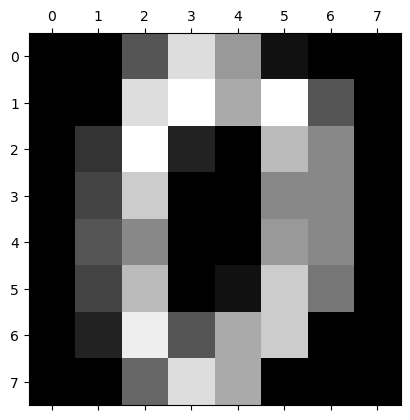

In [22]:
%matplotlib inline
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))
plt.show()

In [26]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
X=df
y=dataset.target

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=30)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9722222222222222

# PCA to reduce dimensions

In [38]:
from sklearn.decomposition import PCA

# pca=PCA(0.95) gives 96.9%
pca = PCA(n_components=33)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 33)

In [39]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca,y, test_size=0.2, random_state=30)

In [40]:
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_pca_train, y_train)

model2.score(X_pca_test, y_test)

0.975